In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import cumtrapz
from gagliardini import *
from scipy.optimize import least_squares #, minimize
import maplookup
#from pygam import LinearGAM, s #, te
plt.style.use('aslak')

from density_core import *

rhoi=917 # used to calculate rho_hat
g=9.82
secperyear = 365.25*24*60*60


In [2]:
bdot = 0.11 * rhoi
T = -31

S6 = DensityCore(site_name='S6', lat=75.6206, lon=-35.971, T=T, bdot=bdot) 
S51 = DensityCore(site_name='S5-1', lat=75.5682717, lon=-35.58572833, T=T, bdot=bdot)
S52 = DensityCore(site_name='S5-2', lat=75.59975, lon=-35.51035, T=T, bdot=bdot)
EG = dataclasses.replace(S6,site_name = 'EGRIP')
EGsune = dataclasses.replace(S6,site_name = 'EGRIP-sune')


load density profiles

In [3]:

df = pd.read_csv('egrip/smoothed_densityprofiles_AG.csv')

S6.set_density_profile(df.z.values, df.S6.values, is_smooth=True)
S51.set_density_profile(df.z.values, df.S5_1.values, is_smooth=True)
S52.set_density_profile(df.z.values, df.S5_2.values, is_smooth=True)
EG.set_density_profile(df.z.values, df.EG.values, is_smooth=True)
EGsune.set_density_profile(df.z.values, df['EG-sune'].values, is_smooth=True)

cores = [S51,S52,EG]
for core in cores: 
    core.e1, core.e2 = maplookup.get_strainrate(lat=core.lat, lon=core.lon, source='dtu', return_eigen_strainrate=True)

cores

[DensityCore(site_name='S5-1', lat=75.5682717, lon=-35.58572833, T=-31, bdot=100.87, e1=-0.005447020783799439, e2=0.004343754924325247),
 DensityCore(site_name='S5-2', lat=75.59975, lon=-35.51035, T=-31, bdot=100.87, e1=-0.0030349755060613557, e2=0.0012020427531997295),
 DensityCore(site_name='EGRIP', lat=75.6206, lon=-35.971, T=-31, bdot=100.87, e1=-0.000258151965484292, e2=0.0013506735763139327)]

In [4]:
rho,a,b = multicore_fit(cores)
a[rho<450]=np.nan
b[rho<450]=np.nan

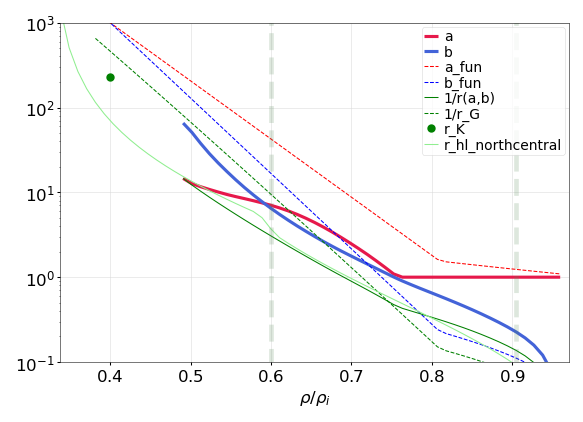

In [6]:


plt.figure(dpi=150)
ha = plt.semilogy(rho/rhoi,a,label='a')
hb = plt.semilogy(rho/rhoi,b,label='b')
plt.semilogy(rho/rhoi,a_fun(rho),label='a_fun',lw=0.5,color='r',ls='--')
plt.semilogy(rho/rhoi,b_fun(rho),label='b_fun',lw=0.5,color='b',ls='--')
plt.semilogy(rho/rhoi,1/r_fun(a,b),label='1/r(a,b)',lw=0.5,c='green')
plt.semilogy(rho/rhoi,1/r_fun(a_fun(rho),b_fun(rho)),label='1/r_G',ls='--',lw=0.5,c='green')
plt.semilogy(0.4,1/r_fun(500,500),'go',label='r_K')




#for core in cores:
#    aa,bb = fit_density_profile(core.z, core.rho, T=core.T, bdot=core.bdot, e1=core.e1, e2=core.e2)
#    plt.semilogy(core.rho/rhoi,1/r_fun(aa,bb),label=f'r_{core.site_name}',lw=0.5,c='cyan')

#from herronlangway import HL_density_profile
#hl_T, hl_bdot, hl_rhos = -31.7, 0.13*rhow, 300 #north central
#hl_z,hl_rho = HL_density_profile(T=hl_T, rhos=hl_rhos, bdot=hl_bdot)
#aa,bb = fit_density_profile(hl_z, hl_rho, T=hl_T, bdot=hl_bdot)
#plt.semilogy(hl_rho/rhoi,1/r_fun(aa,bb),label=f'r_hl_northcentral',lw=0.5,c='lightgreen')
from herronlangway import HL_density_profile

hl= HL_density_profile()
r_hl = singlecore_fit(hl)
plt.semilogy(hl.rho/rhoi,1/r_hl,label=f'r_hl_northcentral',lw=0.5,c='lightgreen')

plt.vlines(x = [550/rhoi, 830/rhoi], ymin = plt.ylim()[0], ymax = plt.ylim()[1], colors='#55885533', linestyle='--',lw=2.2)
plt.legend();
plt.ylim([1e-1,1e3])
plt.xlabel('$\\rho / \\rho_i$');


In [ ]:
rootfolder = '/users/ag/hugedata/sumup'
sumup = pd.read_csv(f'{rootfolder}/density/sumup_densities_cleaned.zip')
